<a href="https://colab.research.google.com/github/vitogunawan18/Vito_Gunawan_2306149_Latihan_Workflow_AI/blob/main/praktikum_ai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
import pandas as pd

# Buat dataset dengan 11 data dan produk yang lebih bervariasi
data = {
    "Tanggal": ["2025-03-11", "2025-03-12", "2025-03-13", "2025-03-14", "2025-03-15",
                "2025-03-16", "2025-03-17", "2025-03-18", "2025-03-19", "2025-03-20",
                "2025-03-21"],
    "Produk": ["Roti", "Keju", "Saus Tomat", "Kecap", "Deterjen",
               "Lotion", "Obat Batuk", "Air Mineral", "Pasta Gigi", "Shampoo",
               "Sabun Mandi"],
    "Jumlah Terjual": [12, 7, 9, 4, 6, 8, 5, 15, 10, 3, 11],
    "Stok": [20, 15, 10, 8, 12, 9, 7, 25, 13, 6, 15],
    "Harga Satuan": [15000, 55000, 12000, 13000, 25000,
                     45000, 30000, 3000, 18000, 40000, 10000]
}

# Konversi ke DataFrame
df = pd.DataFrame(data)

# Simpan sebagai file CSV
df.to_csv("data_penjualan_latihan_1.csv", index=False)

print("File data_penjualan_latihan_1.csv berhasil dibuat!")

File data_penjualan_latihan_1.csv berhasil dibuat!


In [27]:
# Membaca file CSV
df = pd.read_csv("data_penjualan_latihan_1.csv")

# Menampilkan data pertama sebelum transformasi
print(df.to_string())

       Tanggal       Produk  Jumlah Terjual  Stok  Harga Satuan
0   2025-03-11         Roti              12    20         15000
1   2025-03-12         Keju               7    15         55000
2   2025-03-13   Saus Tomat               9    10         12000
3   2025-03-14        Kecap               4     8         13000
4   2025-03-15     Deterjen               6    12         25000
5   2025-03-16       Lotion               8     9         45000
6   2025-03-17   Obat Batuk               5     7         30000
7   2025-03-18  Air Mineral              15    25          3000
8   2025-03-19   Pasta Gigi              10    13         18000
9   2025-03-20      Shampoo               3     6         40000
10  2025-03-21  Sabun Mandi              11    15         10000


In [28]:
#Cek apakah ada data yang hilang
print("\nCek data yang hilang:")
print(df.isnull().sum())

#Konversi kolom "Tanggal" ke format datetime
df["Tanggal"] = pd.to_datetime(df["Tanggal"])

#Tambahkan kolom "Total Penjualan"
df["Total Penjualan"] = df["Jumlah Terjual"] * df["Harga Satuan"]

#Tambahkan kolom "Keuntungan" (Asumsi modal Rp10.000 per produk)
df["Keuntungan"] = df["Total Penjualan"] - (df["Jumlah Terjual"] * 10000)

#Menampilkan hasil 5 data pertama setelah transformasi
print("\nData setelah transformasi:")
print(df.to_string())


Cek data yang hilang:
Tanggal           0
Produk            0
Jumlah Terjual    0
Stok              0
Harga Satuan      0
dtype: int64

Data setelah transformasi:
      Tanggal       Produk  Jumlah Terjual  Stok  Harga Satuan  Total Penjualan  Keuntungan
0  2025-03-11         Roti              12    20         15000           180000       60000
1  2025-03-12         Keju               7    15         55000           385000      315000
2  2025-03-13   Saus Tomat               9    10         12000           108000       18000
3  2025-03-14        Kecap               4     8         13000            52000       12000
4  2025-03-15     Deterjen               6    12         25000           150000       90000
5  2025-03-16       Lotion               8     9         45000           360000      280000
6  2025-03-17   Obat Batuk               5     7         30000           150000      100000
7  2025-03-18  Air Mineral              15    25          3000            45000     -105000
8  2025-

In [29]:
!pip install scikit-learn

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Pilih fitur (X) dan target (y)
X = df[["Jumlah Terjual", "Stok"]]
y = (df["Stok"] < 5).astype(int)  # 1 jika stok kurang dari 5, 0 jika cukup

# Split data menjadi train dan test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Buat model Decision Tree
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Evaluasi model
y_pred = model.predict(X_test)
akurasi = accuracy_score(y_test, y_pred)

# Menampilkan hasil
print(f"Akurasi Model: {akurasi:.2f}")

Akurasi Model: 1.00


In [30]:
# Contoh produk baru (Jumlah Terjual = 8, Stok = 3)
produk_baru=[[8,3]]

# Prediksi menggunakan model yang telah dilatih
prediksi = model.predict(produk_baru)

print("Prediksi untuk produk baru (Jumlah Terjual = 8, Stok = 3):")

if prediksi[0] == 1:
    print("Produk perlu di-restock!")
else:
    print("Stok masih cukup.")

Prediksi untuk produk baru (Jumlah Terjual = 8, Stok = 3):
Stok masih cukup.


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


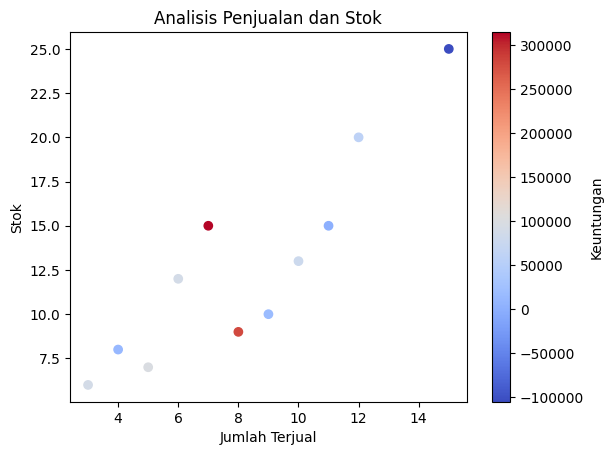

In [32]:
import matplotlib.pyplot as plt

plt.scatter(df["Jumlah Terjual"], df["Stok"], c=df["Keuntungan"], cmap="coolwarm")
plt.xlabel("Jumlah Terjual")
plt.ylabel("Stok")
plt.title("Analisis Penjualan dan Stok")
plt.colorbar(label="Keuntungan")
plt.show()